In [1]:
import pandas as pd
import numpy as np

In [64]:
gdp = pd.read_csv('data/GDP_Per_Capita_A939RX0Q048SBEA.csv')

In [65]:
# Take just the x-01-01
gdp = gdp[gdp['DATE'].str.endswith('-01-01')]

In [67]:
gdp['Year'] = gdp['DATE'].str.split('-', expand=True)[0]

In [68]:
gdp['Year'] = pd.to_numeric(gdp['Year'], errors='coerce', downcast='integer')

In [70]:
gdp = gdp.set_index('Year')

In [101]:
income = pd.read_html('https://www.multpl.com/us-median-income/table/by-year')[0]

In [102]:
# income = pd.read_excel('data/US_median_income_h06ar.xlsx', skiprows=4, )

In [103]:
income.head()

,Date,Value Value
0,"Dec 31, 2016",59039.00
1,"Dec 31, 2015",56515.84
2,"Dec 31, 2014",53657.47
3,"Dec 31, 2013",51939.48
4,"Dec 31, 2012",51016.86


In [104]:
year_col = 'Date'

In [108]:
income['Year'] = income['Date'].str.split(expand=True)[2]

In [109]:
income['Year'] = pd.to_numeric(income['Year'], errors='coerce', downcast='integer')

In [110]:
income = income.dropna(subset=['Year'])

In [111]:
income['Year'] = income['Year'].astype(int)

In [113]:
income = income.set_index('Year')

In [121]:
income = income.rename(columns={'Value Value':'income'})

In [114]:
income['gdp'] = gdp['A939RX0Q048SBEA']

In [117]:
income.head()

,Date,Value Value,gdp
Year,,,
2016,"Dec 31, 2016",59039.00,54640.0
2015,"Dec 31, 2015",56515.84,54071.0
2014,"Dec 31, 2014",53657.47,52293.0
2013,"Dec 31, 2013",51939.48,51921.0
2012,"Dec 31, 2012",51016.86,51468.0


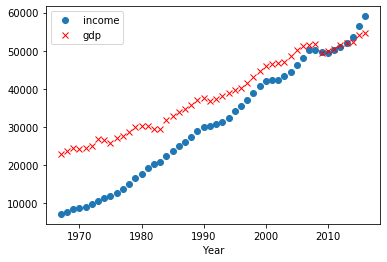

In [122]:
income.plot(style=['o','rx'])